In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

In [52]:
boston_train = pd.read_csv('../datasets/boston_housing/train.csv')
boston_train

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [53]:
boston_train.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.2 KB


In [54]:
def preprocess(data):
    data = data.copy()
    ids = data["ID"]
    data.drop("ID", axis=1, inplace=True)

    return data, ids

In [55]:
y = boston_train["medv"].to_numpy()
x = boston_train.drop("medv", axis=1)

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [57]:
x_train_p, x_train_ids = preprocess(x_train)

In [58]:
x_train_p

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
164,0.11329,30.0,4.93,0,0.428,6.897,54.3,6.3361,6,300,16.6,391.25,11.38
233,0.07244,60.0,1.69,0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79
208,0.79041,0.0,9.90,0,0.544,6.122,52.8,2.6403,4,304,18.4,396.90,5.98
5,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45
33,0.04981,21.0,5.64,0,0.439,5.998,21.4,6.8147,4,243,16.8,396.90,8.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,318.43,29.68
192,0.01965,80.0,1.76,0,0.385,6.230,31.5,9.0892,1,241,18.2,341.60,12.93
117,2.31390,0.0,19.58,0,0.605,5.880,97.3,2.3887,5,403,14.7,348.13,12.03
47,0.08826,0.0,10.81,0,0.413,6.417,6.6,5.2873,4,305,19.2,383.73,6.72


In [59]:
x_train_p_ones = np.column_stack([np.ones(len(x_train_p)), x_train_p.values])
print(x_train_p_ones)

[[1.0000e+00 1.1329e-01 3.0000e+01 ... 1.6600e+01 3.9125e+02 1.1380e+01]
 [1.0000e+00 7.2440e-02 6.0000e+01 ... 1.8300e+01 3.9233e+02 7.7900e+00]
 [1.0000e+00 7.9041e-01 0.0000e+00 ... 1.8400e+01 3.9690e+02 5.9800e+00]
 ...
 [1.0000e+00 2.3139e+00 0.0000e+00 ... 1.4700e+01 3.4813e+02 1.2030e+01]
 [1.0000e+00 8.8260e-02 0.0000e+00 ... 1.9200e+01 3.8373e+02 6.7200e+00]
 [1.0000e+00 2.1409e-01 2.2000e+01 ... 1.9100e+01 3.7707e+02 3.5900e+00]]


In [75]:
beta = np.linalg.inv(x_train_p_ones.T @ x_train_p_ones) @ x_train_p_ones.T @ y_train
beta

array([ 3.72379151e+01, -1.53981023e-01,  3.33916728e-02,  9.96354699e-02,
        4.11641615e+00, -1.96058486e+01,  3.45734898e+00,  4.45783605e-03,
       -1.41894657e+00,  3.46115285e-01, -1.20175421e-02, -8.08134943e-01,
        9.43196778e-03, -6.76244633e-01])

In [61]:
model = LinearRegression()

In [62]:
model.fit(x_train_p, y_train) 

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [63]:
x_test_p, x_test_ids = preprocess(x_test)

In [64]:
x_test_p

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
56,0.03551,25.0,4.86,0,0.426,6.167,46.7,5.4007,4,281,19.0,390.64,7.51
54,0.04113,25.0,4.86,0,0.426,6.727,33.5,5.4007,4,281,19.0,396.90,5.29
276,7.36711,0.0,18.10,0,0.679,6.193,78.1,1.9356,24,666,20.2,96.73,21.52
101,2.73397,0.0,19.58,0,0.871,5.597,94.9,1.5257,5,403,14.7,351.85,21.45
59,0.05188,0.0,4.49,0,0.449,6.015,45.1,4.4272,3,247,18.5,395.99,12.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0.03427,0.0,5.19,0,0.515,5.869,46.3,5.2311,5,224,20.2,396.90,9.80
200,0.09266,34.0,6.09,0,0.433,6.495,18.4,5.4917,7,329,16.1,383.61,8.67
253,20.08490,0.0,18.10,0,0.700,4.368,91.2,1.4395,24,666,20.2,285.83,30.63
256,8.15174,0.0,18.10,0,0.700,5.390,98.9,1.7281,24,666,20.2,396.90,20.85


In [78]:
preds = model.predict(x_test_p)
preds
np.round(preds, decimals=1)

array([25.3, 28.8, 13.9, 13.1, 21.7, 25. , 26.4, 17.5, 26. , 19.4, 17.1,
       25.4, 31.3, 37.4, 15.1, 33.8, 21. , 25.2, 24.8, 24. , 19.6, 20.1,
       19.5,  3.5,  3.1, 22.3, 27.2, 40.5, 23.2, 24.3, 13.6, 35.7, 35.2,
       20.8, 23.5, 12.8, 24.6,  7.2, 20.4, 26.9, 21.3, 27.2, 27.4, 19.7,
       20.9, 29.9, 26.4, 30.9, 21.9, 16.5, 39.4, 23. , 22.6, 17.6, 26.1,
       22.7, 16.4, 16.6, 32.1, 29.1, 31.3, 44.3, 22.4, 18.5, 14.3, 24.7,
       26.5, 20.3, 29.9, -8.1, -1.7, 24.4,  7.4, 16.5, 23.9, 13.1, 25.2,
       19.3, 20.4, 20.6, 28.4,  1.7, 14.3, 19. ])

In [67]:
y_test

array([22.9, 28. , 11. , 15.4, 22.5, 23.4, 23.9, 14.3, 25. , 20.3, 13.8,
       18.5, 31.1, 48.3, 15.2, 34.9, 19.3, 23.2, 24.4, 19.2, 19.4, 21.5,
       16.4,  7.4,  8.8, 20.7, 23.9, 48.5, 21.2, 21.4, 13.4, 43.1, 27. ,
       16.2, 20. , 15.2, 26.2, 17.8, 24.3, 22.6, 21.4, 23.9, 20.6, 21.7,
       18.9, 25. , 26.5, 30.8, 18.7, 19.4, 48.8, 24.7, 20.6, 14.9, 22.2,
       22. , 17.4, 20.2, 31.6, 23.7, 29.9, 50. , 17.4, 12.6, 14.8, 24.4,
       50. , 22.6, 32.2,  7. , 13.8, 24.3,  8.7, 17.6, 24.4, 17.2, 21.6,
       20. , 20.4, 19.5, 26.4,  8.8, 11.5, 18.3])

In [72]:
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
rmse = root_mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)
print(f'mse = {mse}\nmae = {mae}\nrmse = {rmse}\nr2 = {r2}')

mse = 26.22616028688033
mae = 3.4236016945812806
rmse = 5.121148336738581
r2 = 0.6831900012610173


In [80]:
def regression_report(y_true, y_pred):
    print(f"Min y:         {y_true.min():.2f}")
    print(f"Max y:         {y_true.max():.2f}")
    print(f"Mean y:        {y_true.mean():.2f}")
    print(f"Std deviation: {y_true.std():.2f}")
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print()
    print(f"Mean Squared Error (MSE):       {mse:.3f}")
    print(f"Mean Absolute Error (MAE):      {mae:.3f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
    print(f"R^2 Score:                      {r2:.3f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

In [81]:
def regression_plots(y_true, y_pred):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.plot(
        [y_true.min(), y_true.max()],
        [y_true.min(), y_true.max()],
        'r--', lw=2, label='Ideal'
    )
    plt.xlabel('Actual Values')
    plt.ylabel('Predictions')
    plt.title('Predictions vs Actual Values')
    plt.legend()

    plt.subplot(1, 2, 2)
    errors = y_true - y_pred
    plt.hist(errors, bins=30, edgecolor='black')
    plt.xlabel('Error (Actual - Prediction)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Errors')
    plt.tight_layout()
    plt.show()

In [82]:
regression_report(y_test, preds)

Min y:         7.00
Max y:         50.00
Mean y:        22.33
Std deviation: 9.10

Mean Squared Error (MSE):       26.226
Mean Absolute Error (MAE):      3.424
Root Mean Squared Error (RMSE): 5.121
R^2 Score:                      0.683
Mean Absolute Percentage Error (MAPE): 18.77%


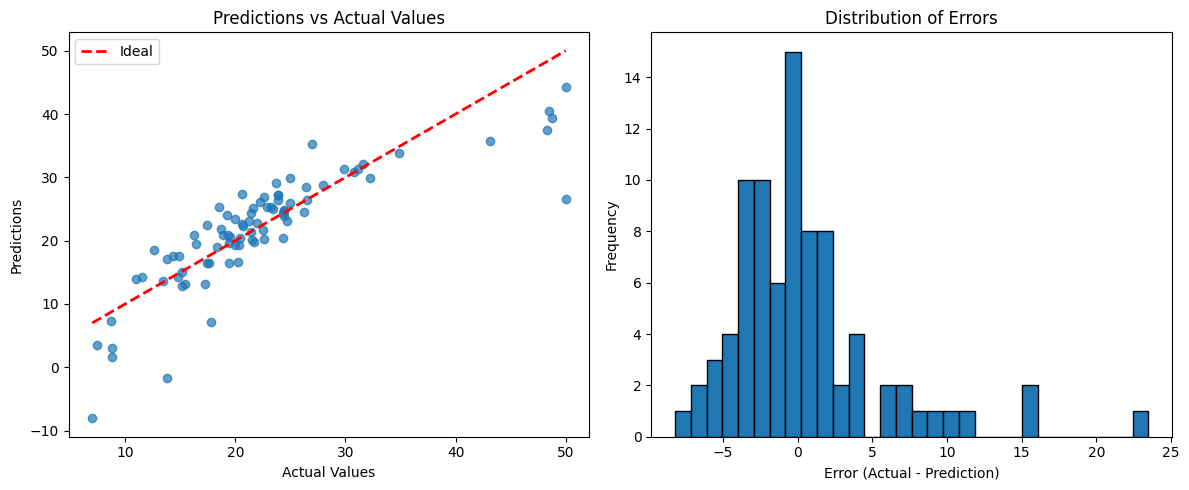

In [83]:
regression_plots(y_test, preds)

In [73]:
b_0, k_0 = model.intercept_, model.coef_
b_0, k_0

(np.float64(37.237915055750896),
 array([-1.53981023e-01,  3.33916728e-02,  9.96354699e-02,  4.11641615e+00,
        -1.96058486e+01,  3.45734898e+00,  4.45783605e-03, -1.41894657e+00,
         3.46115285e-01, -1.20175421e-02, -8.08134943e-01,  9.43196778e-03,
        -6.76244633e-01]))

In [42]:
boston_test = pd.read_csv('../datasets/boston_housing/test.csv')
boston_test

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,496,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391,19.2,393.29,17.60
169,497,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,396.90,21.14
170,499,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92
171,501,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33


In [85]:
boston_test.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       173 non-null    int64  
 1   crim     173 non-null    float64
 2   zn       173 non-null    float64
 3   indus    173 non-null    float64
 4   chas     173 non-null    int64  
 5   nox      173 non-null    float64
 6   rm       173 non-null    float64
 7   age      173 non-null    float64
 8   dis      173 non-null    float64
 9   rad      173 non-null    int64  
 10  tax      173 non-null    int64  
 11  ptratio  173 non-null    float64
 12  black    173 non-null    float64
 13  lstat    173 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 19.1 KB


In [91]:
boston_test_p, boston_test_ids = preprocess(boston_test)

In [92]:
boston_preds = model.predict(boston_test_p)
boston_preds

array([31.18744684, 25.81395711, 17.97036688,  8.53354082, 17.71993097,
       16.86378901, 18.89589864, 15.4642581 , 13.21175882, 15.51792315,
       19.66464372, 21.00439296,  6.74182814, 13.78272471, 24.14592406,
       22.41512078, 23.53852997, 28.55967529,  6.54682132, 27.88153541,
       21.49671836, 24.68379939, 21.2588809 , 22.45509506, 21.745758  ,
       23.43551403, 26.31981243, 27.30002429, 29.51651392, 28.69395397,
       35.78481392, 35.15664257, 32.13606231, 21.75322748, 18.3505133 ,
       20.7443924 , 20.27351295, 20.03547513, 19.97369855, 23.25235452,
       14.49260705, 21.10058121, 21.3771931 , 17.6978334 , 12.93844115,
        9.71354876,  6.10592046, 14.87701528, 18.00193545, 21.54040679,
       20.52606848, 34.24543035, 43.06196409, 26.57237085, 22.00635605,
       23.92485168, 32.00356344, 39.42654562, 34.64881839, 32.86097832,
       29.10290147, 35.79546039, 17.28996165, 17.33190988, 23.36498478,
       23.79400466, 24.9722961 , 28.62875155, 25.61663942, 31.38

In [99]:
id_preds = {'ID': boston_test_ids, 'medv': boston_preds}

In [101]:
result = pd.DataFrame(id_preds)
result

,ID,medv
0,3,31.187447
1,6,25.813957
2,8,17.970367
3,9,8.533541
4,10,17.719931
...,...,...
168,496,16.136126
169,497,12.987770
170,499,21.247747
171,501,20.261935


In [103]:
result.to_csv('boston_housing_submission.csv', index=False)